
# Session 5:
## Growing Causal Trees 
### - *Causal Forests and Generalized Random Forests*

*Andreas Bjerre-Nielsen*

## Agenda

1. Growing causal trees
  - [Recap on Random Forest](Recap-on-Random-Forest)
  - [Causal Forest](#Causal-Forest)
  - [Generalized Random Forest](#Generalized-Random-Forest) (GRF)
1. Applying GRF 
  - [In-class research: heterogeneous treatment effects](#In-class-research:-heterogeneous-treatment-effects)
  - [A tutorial on using grf within Python](A-tutorial-on-using-grf-within-Python)
  

# Recap on Random Forest

## The  forest full of trees

What is the difference between a Decision Tree and a Random Forest?

- Decision tree iteratively splits data into subsets (partitions) and calculates mean outcome in leaves (end of splits)
- Minimize on some criteria, often entropy or similar loss function
- Collection/ensemble of decision trees
  - Subset of data by bootstrap (sampling with replacement)
  - Subset of features

<center><img src='https://p1.pxfuel.com/preview/386/193/136/forest-of-rugen-trees-beech-wood-nature-deciduous-forest-rest-national-park.jpg' alt="Drawing" style="width: 680px;"/></center>






## A special tree 

So what distinguishes a Causal Tree from a Decision Tree?

- Causal tree estimates partition of data where treatment effects can be computed locally 
- In order to have valid estimates we need **honesty** of trees by estimating partitions and treatment effects on different subsets of data
  - Analogy to train / test split


<br>
<br>

<center><img src='https://live.staticflickr.com/2880/33000342484_8681f68a01_b.jpg' alt="Drawing" style="width: 600px;"/></center>


## A tradeoff in structure of heterogeneity


Two approaches? 

- Data driven heterogeneity
  - Based on causal trees etc.
- A priori sensible heterogeneity 
  - e.g. gender, socioeconomic, ethnicity
  - we use regression model and have interaction with desired variable

When to choose which?
- Choose data driven heterogeneity for policy where you want to maximize impact given data (no theory)
- If we want to test whether certain subgroups are adversely affected

## Limitations of Decision Trees 


Random forests are nice but no asymptotic normality of prediction.

- Crucial for inference! (corresponds to MLR6 in Econometrics 1)

- Also holds for causal trees



# Random forest for inference and treatment effecs

## Causal  Trees

The goal of causal trees is to establish unbiased, consistent estimates of heterogeneous treatment effects
- also known as conditional average treatment effects (**CATE**)
- the effect size is denoted $\hat{\tau}(x)$;
- standard tools for inference, e.g. using statistical tests locally










## Causal Forest 

What is the output from the decisions trees? Each tree produces a partitioning of the feature space $X$. Example of three trees:

<center><img src='partitions.JPG' alt="Drawing" style="width: 1000px;"/></center>

(from [Athey, Wager, Tibshirani, 2019](https://doi.org/10.1214/18-aos1709))

## Double Sample Trees 

For Causal Trees

- first half ($\mathcal{J}$, $|\mathcal{J}|=\lceil s / 2\rceil$)
  - training Decision Tree
    - minimize adjusted MSE 
    - require at least $k$ observations for both treatment and control in all leaves of $\mathcal{I}$-sample
- other half  ($\mathcal{I}$, $|\mathcal{I}|=\lfloor s / 2\rfloor$)
  - estimating treatment effects, $\hat{\tau}(x)$

## Double Sample Trees (2)

For Regression Trees 

- first half ($\mathcal{J}$, $|\mathcal{J}|=\lceil s / 2\rceil$)
  - training Decision Tree
    - minimize MSE / Gini etc.
    - require at least $k$ observations in all leaves of $\mathcal{I}$-sample
- other half  ($\mathcal{I}$, $|\mathcal{I}|=\lfloor s / 2\rfloor$)
  - estimating outcome, $\hat{\mu}(x)$


**Quiz:** How is this different from normal Decision Trees for regression problems?


- Unlike normal decision trees outcomes are estimated honestly.


## Main results: econometric properties (1)

[Wager and Athey (2017)](https://doi.org/10.1080/01621459.2017.1319839) show 
 - We can estimate the variance of CATE
 - $\hat{V}_{IJ}(x)=\frac{n-1}{n}\left(\frac{n}{n-s}\right)^{2} \sum_{i=1}^{n} \operatorname{Cov}_{*}\left[\hat{\tau}_{b}^{*}(x), N_{i b}^{*}\right]^{2}$

## Main results: econometric properties (2)

From Theorem 4.1 in [Wager and Athey (2017)](https://doi.org/10.1080/01621459.2017.1319839)

- The conditional average treatment estimates are unbiased and consistent
  - unbiased: no systematic error of measurement
  - consistency: with more data our estimate approaches true value 

- Moreover, we can do inference:
  - The variance estimator $\hat{V}_{IJ}(x)$ is consistent.
  - Treatment effect estimates are asymptotic normal and unbiased
    - $(\hat{\tau}(x)-\tau(x)) / \sqrt{\operatorname{Var}[\hat{\tau}(x)]} \Rightarrow \mathcal{N}(0,1)$

Caveat: only works for evaluating treatment effects in one point $x$! Do not perform multiple tests.

## Useful forests

Two more procedures

1. Double Sampled Trees
  - using Regression trees for predicting outcome (=$\hat{\mu}(x)$)
1. Propensity Trees
  -  using propensity trees for propensity score matching
 
 

What is the shared procedure? 
- Each tree is estimated using repeated subsampling (**no replacement**)
  - Constrast to bootstrap aggregation in random forest (sample **with replacment**)
- Random subsample of features  

## More results 

[Wager and Athey (2017)](https://doi.org/10.1080/01621459.2017.1319839) show that the same properties of Double Sample Trees using causal trees also hold analogously for regression trees. 
- Random forests  have the property of being asymptotic normal and can thus be used for inference
- Similar intuition as idea of nested CV where we could do inference

## Simulation experiment

[Wager,  and Athey (2017)](https://doi.org/10.1214/18-aos1709) compare causal forest to nearest neighbor methods

- random forest is kind of local nearest neighbor estimate
- based on work by Lin and Jeon (2006).

## Simulation (1) 

- simulation setup: no treatment effect, only confounding factors
- method: propensity trees 
- comparison of estimated treatment effects  
    - lower MSE and better coverage
    - coverage falls for increasing number of variables $d$

<center><img src='cf_tab1.JPG' alt="Drawing" style="width: 700px;"/></center>

(from [Athey, Wager, Tibshirani, 2019](https://doi.org/10.1214/18-aos1709))

## Simulation (2) 

- setup: heterogeneous treatment effect, **no** confounding factors

- comparison of estimated treatment effects
    - lower MSE and better coverage
    - coverage falls for increasing number of variables $d$

<center><img src='cf_tab2.JPG' alt="Drawing" style="width: 700px;"/></center>

(from [Athey, Wager, Tibshirani, 2019](https://doi.org/10.1214/18-aos1709))

## Meta learners for heterogeneous treatment effects 

Other procedures have been investigated

- [Künzel et al. (2019)](https://doi.org/10.1073/pnas.1804597116) investigates more general class of prediction tools for partitioning data using 

  - Lower EMSE in many cases relative to causal forest and BART (Bayesian additive regression trees)
  
- [Nie and Wager (2017)](https://arxiv.org/pdf/1712.04912.pdf) investigates another class of methods called R-learners that leverages a smart representation of CATE.

## Round-up causal forest

Summary of [Wager and Athey (2017)](https://doi.org/10.1080/01621459.2017.1319839) 
- builds on Causal Trees method
- strong econometric properties
  - unbiased and consistent
  - asymptotic normality given $x$
      - causal and regression forest allows inference!
- problem: 
  - must choose focus 
    - unconfounding (propensity) or 
    - estimate CATE
  - coverage was not good, especially for higher $d$!
  



# Generalized Random Forest

## A higher aim

Causal forests are pretty cool. Can we use our honest procedure more generally? 

- Estimate any quantity $\theta(x)$ identified via local moment conditions, e.g.
  - simultaneously unconfound and find heterogeneity?
  - find heterogeneous treatment effects from IV estimation?

## Different purpose

How does this look?



- The general moment conditions
    - $\mathbb{E}\left[\psi_{\theta(x), \nu(x)}\left(O_{i}\right) | X_{i}=x\right]=0, \quad \forall x.$
    
- Where $\psi$  estimating function, maps parameters and data into moment equations
  - Parameters
    - $\theta$ parameter we want estimate 
    - $\nu$ is nuisance we want to "partial out"
  - Data     
    - $O_i$ main objects we are interested in modelling, e.g. $Y_i, D_i$
    - $X_i$ covariates

## Different purpose (2)

What is a moment condition?



- Similiar to solution to first order condition
- More general - can incorporate extra restrictions (e.g. unconfounding)

## Different purpose (3)

Suppose we want to estimate treatment effects

Functional form: $\psi_{\beta(x),c(x)}=Y_i-\beta(x)W_i-c(x)$ where
  - $\beta$ is treatment effect
  - $c$ is nuisance parameter

## Using a kernel

Kernel methods can be used to unconfound and compute heterogeneous effects simulateneously


- Problem how to decide weights? 



<center><img src='partitions_weights.JPG' alt="Drawing" style="width: 1000px;"/></center>


(from [Athey, Wager, Tibshirani, 2019](https://doi.org/10.1214/18-aos1709))

## The Generalized Random Forest

[Athey, Wager, Tibshirani (2019)](https://doi.org/10.1214/18-aos1709) show that kernel weights can be estimated using forest methods

- can be adapted for different purposes
  - quantile regression
  - heterogeneous treatment effects
  - instrumental variables

## The Generalized Random Forest (2)

[Athey, Wager, Tibshirani (2019)](https://doi.org/10.1214/18-aos1709) use a procedure as follows:

1. Use estimating equation, $\psi$ to estimate tree splits iteratively on subsample. 
2. View forests as a weights of similar neighbors
    - Amount of partitions where observations 
  \begin{equation}\alpha_i(x)=\frac{1}{B}\sum_{b=1}\frac{\mathbb{1}(X_i\in L_b(x))}{|L_b(x)|}\end{equation}
3. Re-estimate $\psi$ using weights on entire sample.

Difference from Causal Forest - trees are used for constructing weights!

# In-class research: heterogeneous treatment effects


## The student as a researcher

We will try to make a collaborative effort in doing a research project. 

The primary goal is to learn how to apply the methods. Our effort may turn into research.


## The task

Work alone or in pairs.

1. Find a research paper that runs an experiment, either field or lab. Requirements for paper:
  - There are is at least one or more covariates for each treated unit (e.g. gender if individuals).
  - There is experimental data is available. You may look in the dataverse at Harvard or papers from experimental economics etc.
1. Make a function that loads and structure the data in Python. The output should contain:
  - Outcomes, $y$ a vector with $n$-observations 
  - Treatments, $D$ a vector with $n$-observations with $0,1$  
  - Covariates, $X$ a matrix with $n\times k$ dimensions
1. Try to replicate the results in terms of computing ATE or ATT.
1. Use `grf` to compute average treatment effects and heterogeneous treatment effects.
  - Hint: you can use the `grf` tutorial [here](https://grf-labs.github.io/grf/articles/grf.html).

# A tutorial on using grf within Python
## Leveraging the rpy2 package

## Installing R in Anaconda

Note if the script below fails go to the bottom.

In [ ]:
!conda install -c r rpy2 -y

## Import R in python

If the code below fails, check out the guidance on adding PATH variables [for Linux or Mac](https://stackoverflow.com/questions/51486081/install-and-use-rpy2-using-conda-so-that-it-uses-default-r-installation-in-us) and [for Windows](https://anaconda.zendesk.com/hc/en-us/articles/360023857134-Setting-up-rpy2-on-Windows)

In [4]:
import rpy2
import rpy2.robjects as robjects

## Installing R from Python

In [1]:
# import rpy2's package module
import rpy2.robjects.packages as rpackages

# import R's utility package
utils = rpackages.importr('utils')

# select a mirror for R packages
utils.chooseCRANmirror(ind=1) # select the first mirror in the list

# R package names
packnames = ('ggplot2', 'hexbin', 'grf')

# R vector of strings
from rpy2.robjects.vectors import StrVector

# Selectively install what needs to be install.
# We are fancy, just because we can.
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

## Importing R package from Python

In [31]:
from rpy2.robjects.packages import importr
grf = importr('grf')

## Make synthetic data

In [117]:
import numpy as np
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
import rpy2.robjects as ro

n, p = 2000, 10
X = np.random.randn(n,p)
P = 0.4 + 0.2 * (X[:, 0] > 0)
D = (np.random.rand(n) > P).astype('float')
Y = np.max([X[:, 0] * D, np.zeros(n)],0) + \
    X[:, 1] + np.max([X[:, 2] * D, np.zeros(n)],0)

## Apply `grf`'s causal forest 

In [118]:
from rpy2.robjects.packages import importr
grf = importr('grf')

X_r = ro.r.matrix(X, nrow=n, ncol=p)
Y_r = ro.r.matrix(Y, nrow=n, ncol=1)
D_r = ro.r.matrix(D, nrow=n, ncol=1)

tau_forest = grf.causal_forest(X_r, Y_r, D_r)

## Getting predicted treatment effects for x range

In [119]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

X_range = np.zeros([201,p])
X_range[:,0] = np.linspace(-2,2,201)
X_range_r = ro.r.matrix(X_range, nrow=n, ncol=10)

tau_hat_r = ro.r.predict(tau_forest, X_range)
tau_hat = pandas2ri.ri2py(tau_hat_r)['predictions'].values

C:\Users\bvq720\AppData\Local\Continuum\anaconda3\lib\site-packages\rpy2\robjects\pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


## Plotting treatment effects

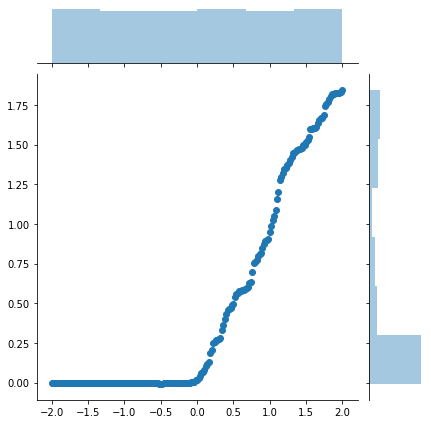

In [120]:
import seaborn as sns
%matplotlib inline
sns.jointplot(X_range[:,0], tau_hat)

## Alternate way of installing GRF

- Step 1: download or look up the yaml file `sds_eml_2020.yml` from the GitHub repository (same folder as this file). This will be used to install a new conda environment from scratch.

- Step 2: go to the folder on your computer where you put the `sds_eml_2020.yml` file.

- Step 3: type in the lines below into the Anaconda Prompt / Terminal

```
conda env create -f sds_eml_2020.yml
conda activate sds_eml_2020
python -m ipykernel install --user --name python_grf --display-name "Python GRF"
```

- Step 4: restart your jupyter notebook. Select the new kernel called `Python GRF`.